In [1]:
from veldis.veldis import Veldis
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit
from specim.specfuncs import spec1d

### velocity dispersion from both extracted ESI and LRIS 1d spectra

## ESI spectra

In [2]:
spec = Veldis('../spectra_extraction/B0631_ESI_spectra/spec1d_B0631_esi_coadd2d_deflector.fits', 
              informat='fits', logwav=True, trimsec=[955, 10900])


Reading spectrum from ../spectra_extraction/B0631_ESI_spectra/spec1d_B0631_esi_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  6025.10
 Spectrum End:     8791.03
 Dispersion (1st pixel):   0.23
 Dispersion (average):      0.28




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       6075.00
[Fe VII]      3761.40       6093.47
H-iota        3770.00       6107.40
H-theta       3797.00       6151.14
H-eta         3835.00       6212.70
CN bandhd     3883.00       6290.46
CaII K        3933.67       6372.55
CaII H        3968.47       6428.92
H-delta       4101.00       6643.62
G-band        4305.00       6974.10
H-gamma       4340.00       7030.80
Fe4383        4383.00       7100.46
Ca4455        4455.00       7217.10
Fe4531        4531.00       7340.22
H-beta        4861.00       7874.82
Mg I (b)      5176.00       8385.12



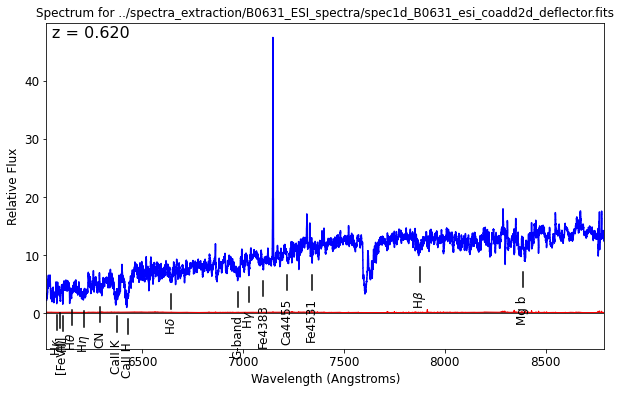

In [3]:
#%matplotlib notebook
fg = plt.figure(figsize=(10,6))
spec.smooth(11, fig=fg)
spec.mark_lines('abs', z=0.620, usesmooth=True)
#spec.mark_lines('em', z=0.407, usesmooth=True)

In [9]:
spec.closest_wavelength(wavrange=[[6025, 8790]])


Given waverange(assumed) : 

6025 8790

Closest waverange to the given ones : 

6025.096401358343 8790.032888154492


([(6025.096401358343, 8790.032888154492)], [(955, 10896)])


The wavelength is red shifted.
Velocity scale = 11.389911 km/s


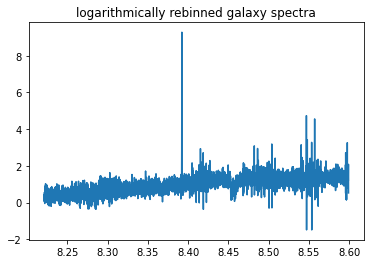

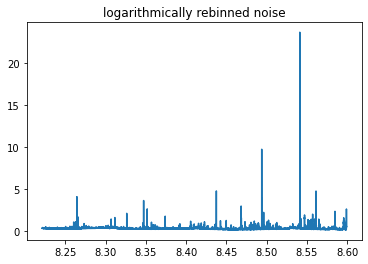

In [4]:
spec.cal_parm(z=0.620, high_z=True, logscale=True, veldis_start=300, noise_scale=0.3)

In [5]:
temp_spec = spec.gen_rebinned_temp(lib_path='../TEXT/*', temp_num=400, sig_ins=2.3)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -21223.716403 

sigma_diff : 3.247196


In [8]:
mask_reg = np.log(np.array([(7137, 7157), (7280, 7347), (7312, 7319), (7338, 7342), (7580, 7775),
                            (8640, 8697)])/1.62)
print(mask_reg)

[[8.39062165 8.39342003]
 [8.41045999 8.4196212 ]
 [8.41484596 8.41580284]
 [8.41839546 8.41894041]
 [8.45084233 8.47624259]
 [8.58173171 8.58830727]]



degree : 6
 Best Fit:       Vel     sigma
 comp.  0:    299931        46
chi2/DOF: 0.5759; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  5 / 400

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:    299936         0
chi2/DOF: 0.5697; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 400

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:    299980       119
chi2/DOF: 0.5684; degree = 8; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  3 / 400

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:    299923         0
chi2/DOF: 0.5681; degree = 9; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 21; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  4 / 400

degree : 10
 Best Fit:       Vel     sigma
 comp.  0:    299930 

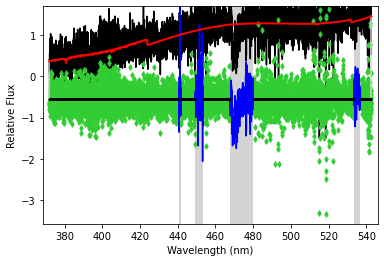

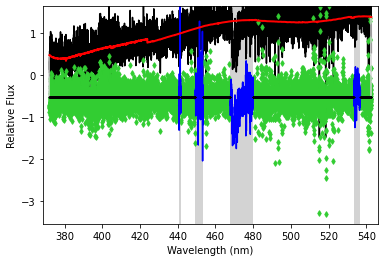

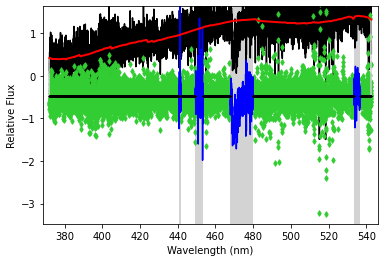

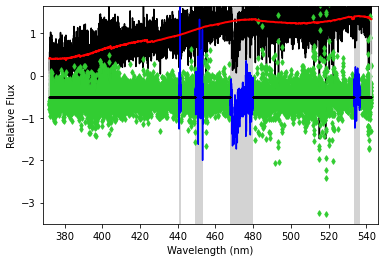

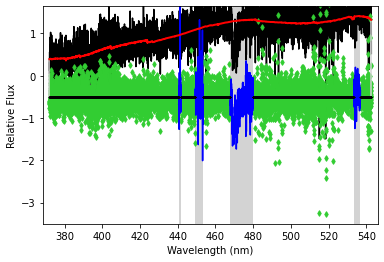

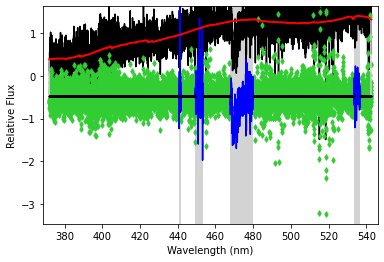

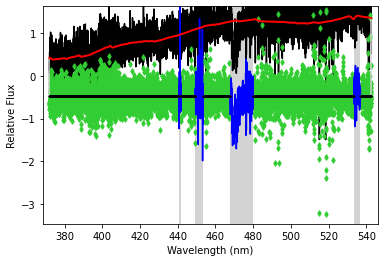

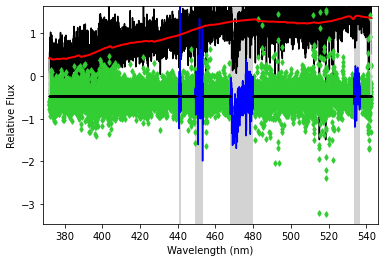

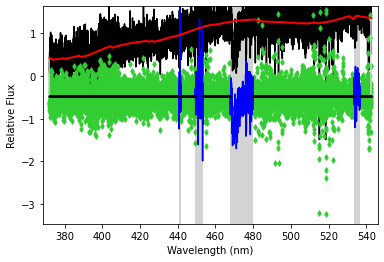

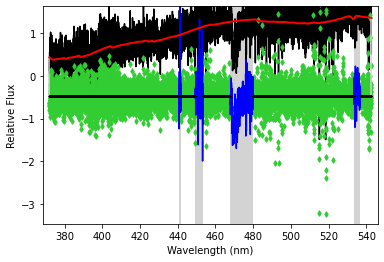

<Figure size 432x288 with 0 Axes>

In [9]:
spec.cal_veldis(temp_spec=temp_spec, degree=[6, 16], mask_reg=mask_reg, show_weight=True, moments=2)

### Without red shifting

In [10]:
spec1 = Veldis('../spectra_extraction/B0631_ESI_spectra/spec1d_B0631_esi_coadd2d_deflector.fits', 
              informat='fits', logwav=True, trimsec=[955, 10900])


Reading spectrum from ../spectra_extraction/B0631_ESI_spectra/spec1d_B0631_esi_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  6025.10
 Spectrum End:     8791.03
 Dispersion (1st pixel):   0.23
 Dispersion (average):      0.28



Velocity scale = 11.389911 km/s


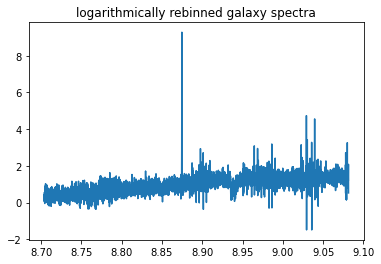

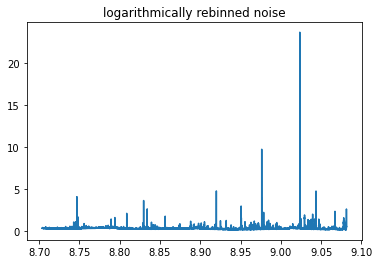

In [11]:
spec1.cal_parm(z=0.620, high_z=False, logscale=True, veldis_start=300, noise_scale=0.3)

In [12]:
temp_sp = spec1d.Spec1d('../TEXT/100006.txt')
spec1.gen_sigma_diff(wav_temp=temp_sp['wav'], sig_ins=0.85)


Reading spectrum from ../TEXT/100006.txt
Expected file format: text
 Spectrum Start:  3465.00
 Spectrum End:     9469.00
 Dispersion (1st pixel):   0.40
 Dispersion (average):      0.40


As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -165851.437489 

sigma_diff : 1.569009


1.5690089689323143

In [13]:
tm_data=np.loadtxt('logrebinned_template_array_for_esi_sig_ins.txt')

In [14]:
mask_reg1 = np.log(np.array([(7137, 7157), (7280, 7347), (7312, 7319), (7338, 7342), (7580, 7775),
                            (8640, 8697)]))
print(mask_reg1)

[[8.8730478  8.87584618]
 [8.89288614 8.90204735]
 [8.89727211 8.89822899]
 [8.9008216  8.90136656]
 [8.93326848 8.95866874]
 [9.06415786 9.07073342]]



degree : 6
 Best Fit:       Vel     sigma
 comp.  0:    144512       149
chi2/DOF: 0.5265; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1272

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:    144517       142
chi2/DOF: 0.5258; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1272

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:    144516       143
chi2/DOF: 0.5257; degree = 8; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  22 / 1272

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:    144516       145
chi2/DOF: 0.5256; degree = 9; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1272

degree : 10
 Best Fit:       Vel     sigma
 comp.  0:  

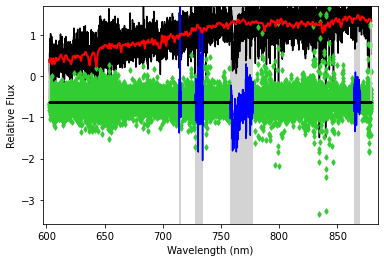

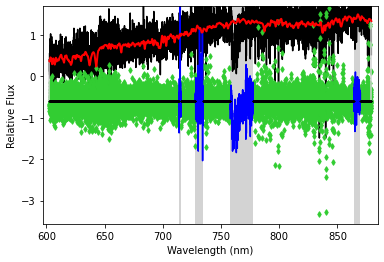

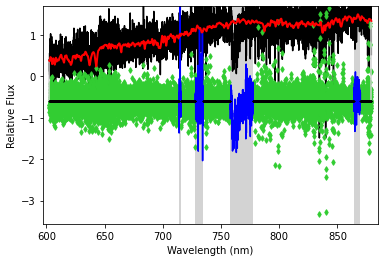

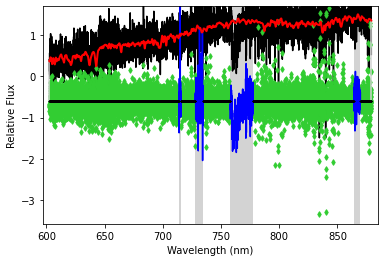

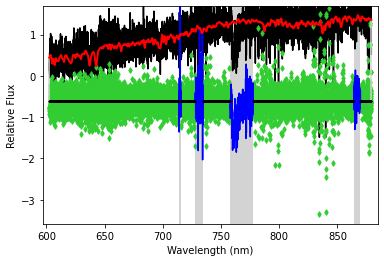

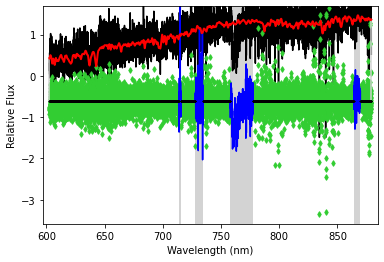

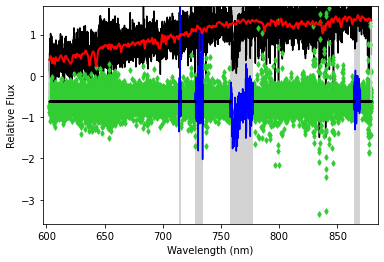

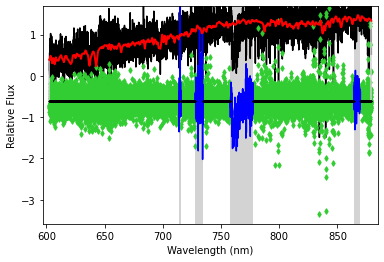

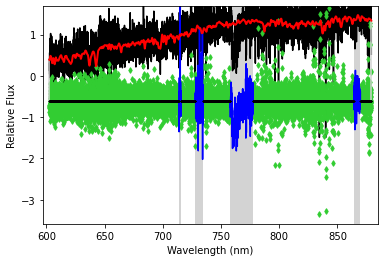

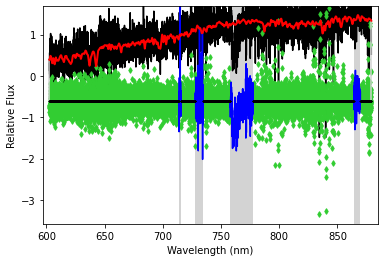

<Figure size 432x288 with 0 Axes>

In [16]:
spec1.cal_veldis(temp_spec=tm_data, degree=[6, 16], mask_reg=mask_reg1, show_weight=True, moments=2)

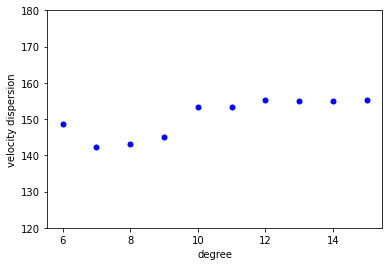

In [19]:
spec1.plot_veldis(ylim=[120, 180])

order : 8


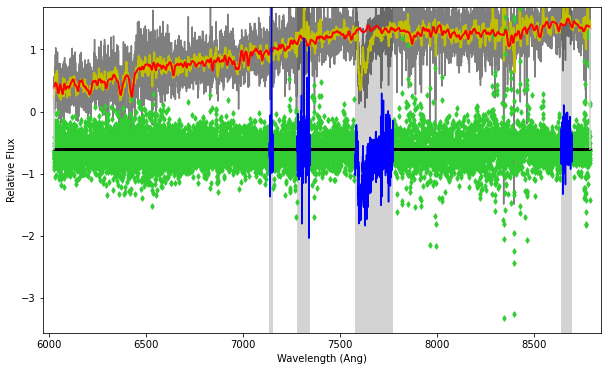

order : 10


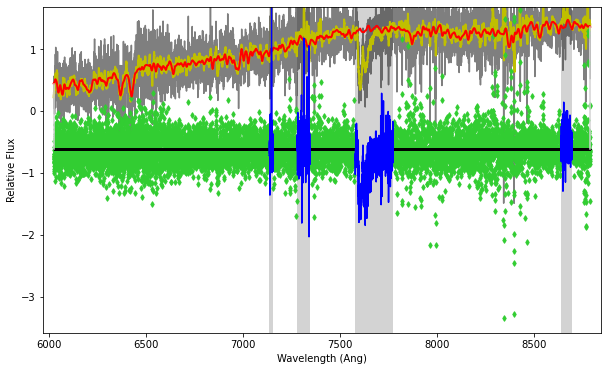

order : 12


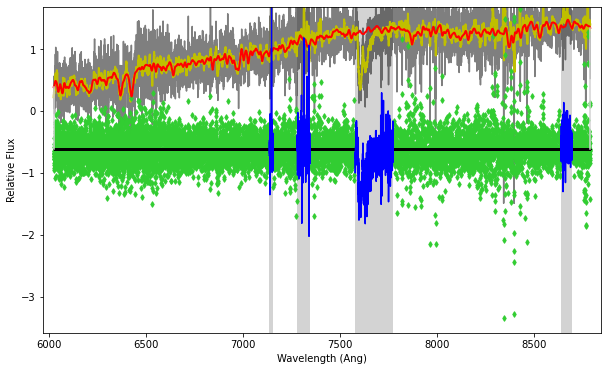

In [21]:
ord_list = np.array([8, 10, 12])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec1.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()

In [22]:
mask_reg2 = np.log(np.array([(7137, 7157), (7580, 7775),
                            (8640, 8697)])) #(7280, 7347), (7312, 7319), (7338, 7342),
print(mask_reg2)

[[8.8730478  8.87584618]
 [8.93326848 8.95866874]
 [9.06415786 9.07073342]]



degree : 6
 Best Fit:       Vel     sigma
 comp.  0:    144516       148
chi2/DOF: 0.5312; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1272

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:    144520       143
chi2/DOF: 0.5306; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  19 / 1272

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:    144520       144
chi2/DOF: 0.5306; degree = 8; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  21 / 1272

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:    144519       145
chi2/DOF: 0.5305; degree = 9; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1272

degree : 10
 Best Fit:       Vel     sigma
 comp.  0:  

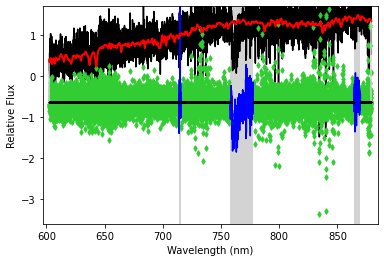

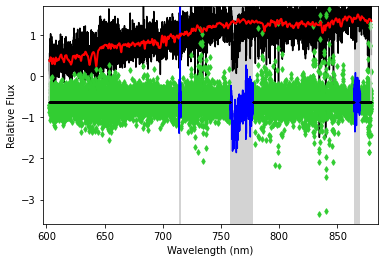

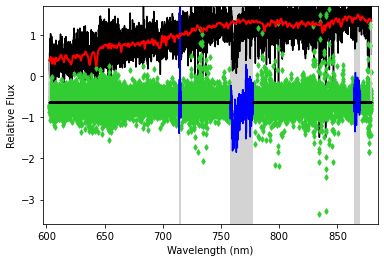

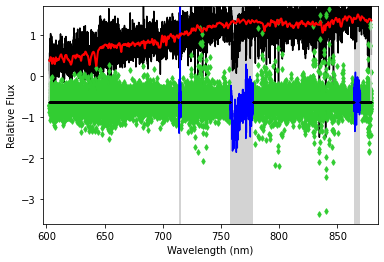

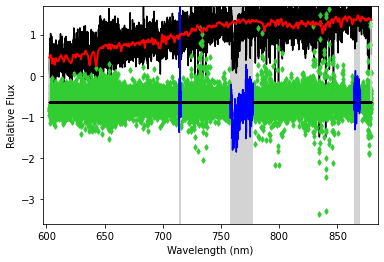

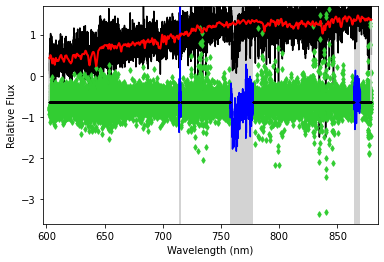

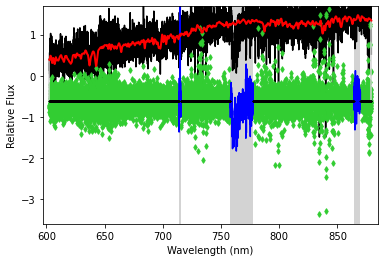

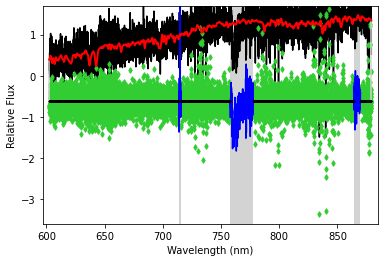

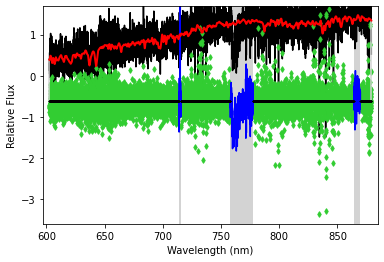

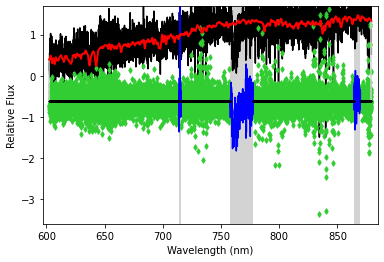

<Figure size 432x288 with 0 Axes>

In [23]:
spec1.cal_veldis(temp_spec=tm_data, degree=[6, 16], mask_reg=mask_reg2, show_weight=True, moments=2)

# blue side

In [27]:
spec_b = Veldis('../spectra_extraction/B0631_ESI_spectra/spec1d_B0631_esi_coadd2d_deflector.fits', 
              informat='fits', logwav=True, trimsec=[955, 6500])


Reading spectrum from ../spectra_extraction/B0631_ESI_spectra/spec1d_B0631_esi_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  6025.10
 Spectrum End:     7437.72
 Dispersion (1st pixel):   0.23
 Dispersion (average):      0.25




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       6075.00
[Fe VII]      3761.40       6093.47
H-iota        3770.00       6107.40
H-theta       3797.00       6151.14
H-eta         3835.00       6212.70
CN bandhd     3883.00       6290.46
CaII K        3933.67       6372.55
CaII H        3968.47       6428.92
H-delta       4101.00       6643.62
G-band        4305.00       6974.10
H-gamma       4340.00       7030.80
Fe4383        4383.00       7100.46
Ca4455        4455.00       7217.10
Fe4531        4531.00       7340.22



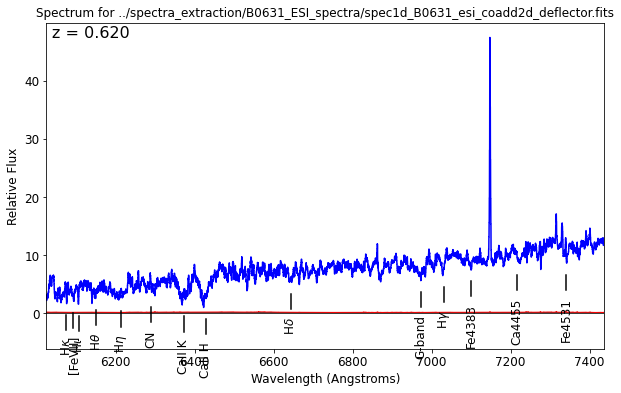

In [28]:
fg = plt.figure(figsize=(10,6))
spec_b.smooth(11, fig=fg)
spec_b.mark_lines('abs', z=0.620, usesmooth=True)

Velocity scale = 11.389911 km/s


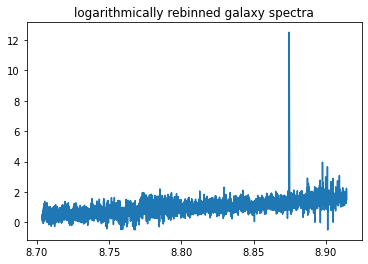

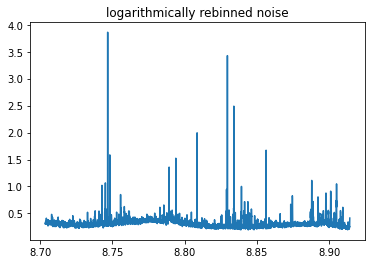

In [31]:
spec_b.cal_parm(z=0.620, high_z=False, logscale=True, veldis_start=300, noise_scale=0.3)

In [32]:
#temp_sp = spec1d.Spec1d('../TEXT/100006.txt')
spec_b.gen_sigma_diff(wav_temp=temp_sp['wav'], sig_ins=0.85)


As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -165851.437489 

sigma_diff : 1.569009


1.5690089689323143

In [33]:
mask_reg_b1 = np.log(np.array([(7137, 7157), (7280, 7347), (7312, 7319), (7338, 7342)]))
print(mask_reg_b1)

[[8.8730478  8.87584618]
 [8.89288614 8.90204735]
 [8.89727211 8.89822899]
 [8.9008216  8.90136656]]



degree : 4
 Best Fit:       Vel     sigma
 comp.  0:    144520       153
chi2/DOF: 0.9467; degree = 4; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1272

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:    144519       154
chi2/DOF: 0.9467; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1272

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:    144518       152
chi2/DOF: 0.9440; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1272

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:    144526       156
chi2/DOF: 0.9421; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1272

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:   

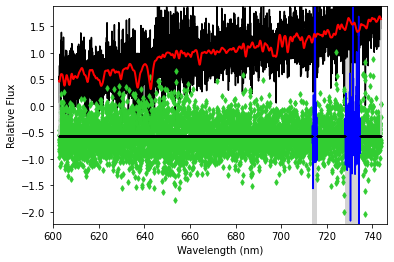

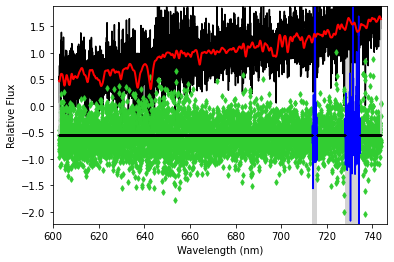

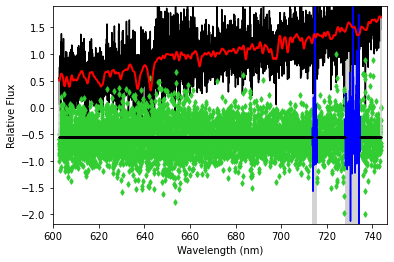

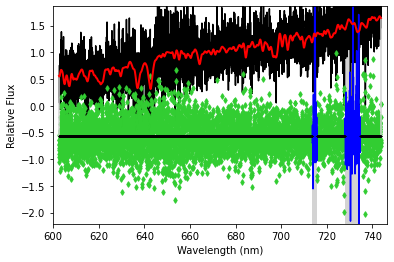

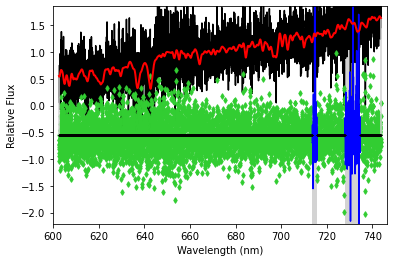

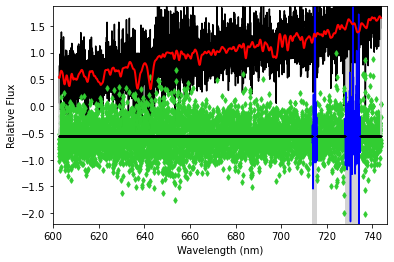

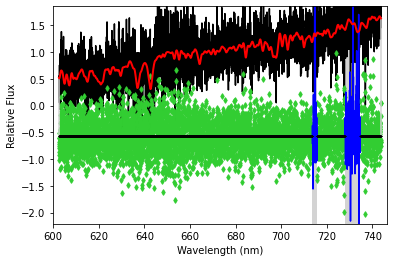

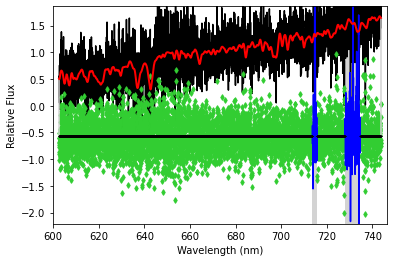

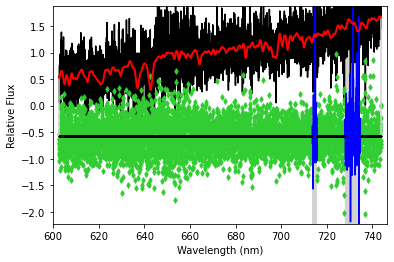

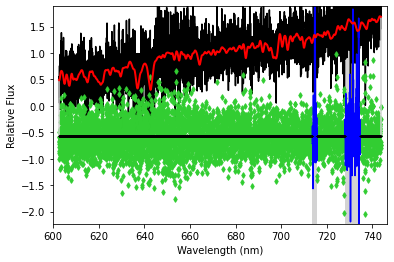

<Figure size 432x288 with 0 Axes>

In [34]:
spec_b.cal_veldis(temp_spec=tm_data, degree=[4, 14], mask_reg=mask_reg_b1, show_weight=True, moments=2)

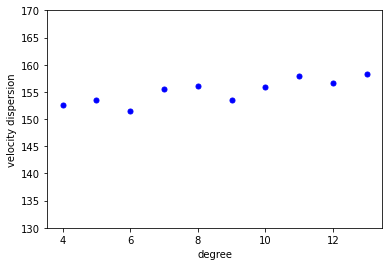

In [36]:
spec_b.plot_veldis(ylim=[130, 170])

order : 8


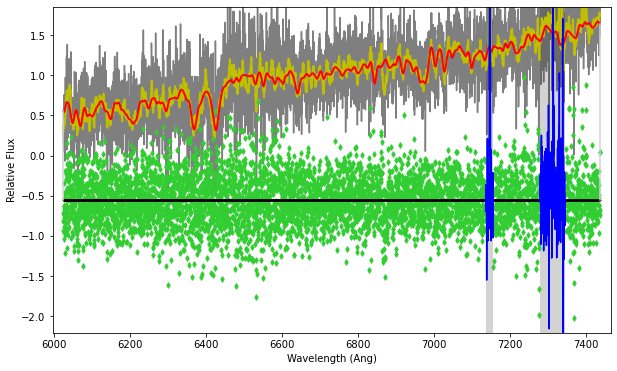

order : 10


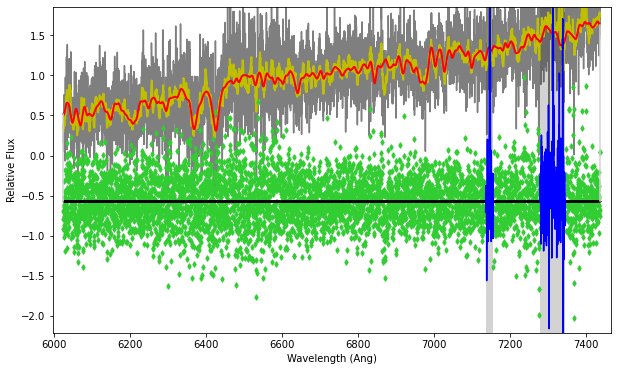

order : 12


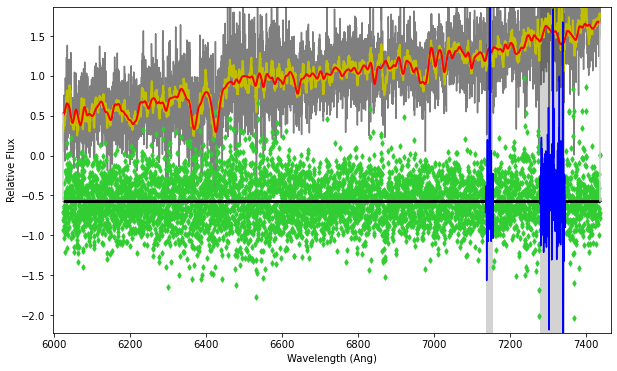

In [37]:
ord_list = np.array([8, 10, 12])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_b.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()

### Red side

In [29]:
spec_r = Veldis('../spectra_extraction/B0631_ESI_spectra/spec1d_B0631_esi_coadd2d_deflector.fits', 
              informat='fits', logwav=True, trimsec=[6500, 10900])


Reading spectrum from ../spectra_extraction/B0631_ESI_spectra/spec1d_B0631_esi_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  7438.01
 Spectrum End:     8791.03
 Dispersion (1st pixel):   0.28
 Dispersion (average):      0.31




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-beta        4861.00       7874.82
Mg I (b)      5176.00       8385.12



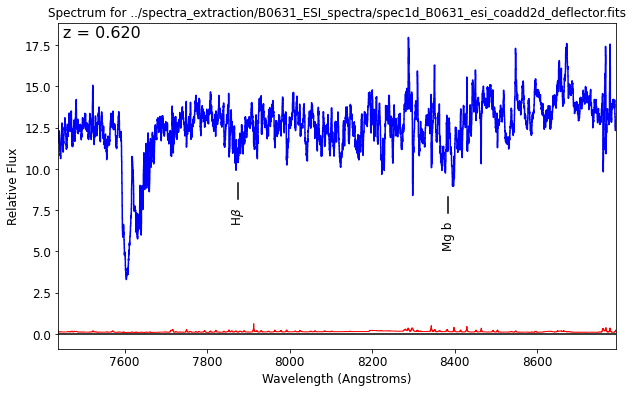

In [30]:
fg = plt.figure(figsize=(10,6))
spec_r.smooth(11, fig=fg)
spec_r.mark_lines('abs', z=0.620, usesmooth=True)

Velocity scale = 11.389911 km/s


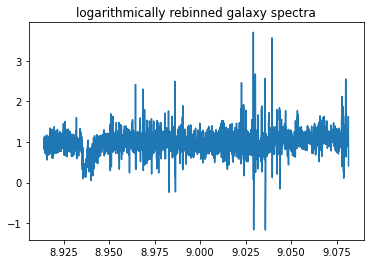

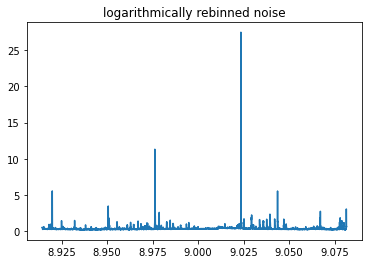

In [38]:
spec_r.cal_parm(z=0.620, high_z=False, logscale=True, veldis_start=300, noise_scale=0.3)

In [39]:
#temp_sp = spec1d.Spec1d('../TEXT/100006.txt')
spec_r.gen_sigma_diff(wav_temp=temp_sp['wav'], sig_ins=0.85)


As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -229008.494754 

sigma_diff : 1.569009


1.5690089689323143

In [40]:
mask_reg_r1 = np.log(np.array([(7580, 7775), (8640, 8697)]))
print(mask_reg_r1)

[[8.93326848 8.95866874]
 [9.06415786 9.07073342]]



degree : 4
 Best Fit:       Vel     sigma
 comp.  0:    144505       149
chi2/DOF: 0.2819; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1272

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:    144498       163
chi2/DOF: 0.2817; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1272

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:    144502       169
chi2/DOF: 0.2812; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1272

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:    144505       164
chi2/DOF: 0.2812; degree = 7; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1272

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:   

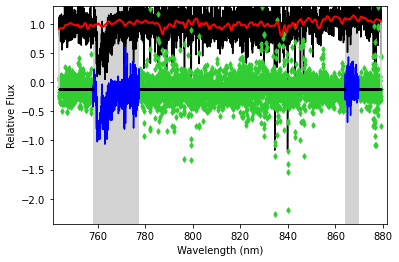

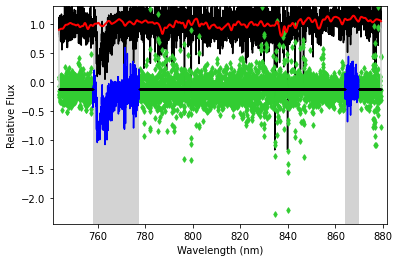

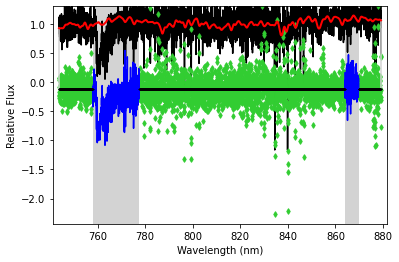

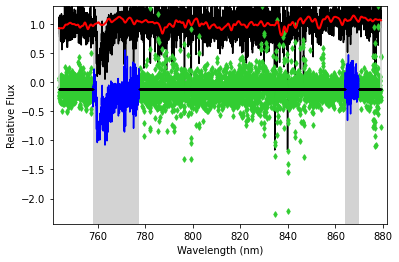

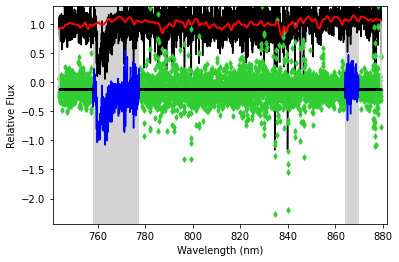

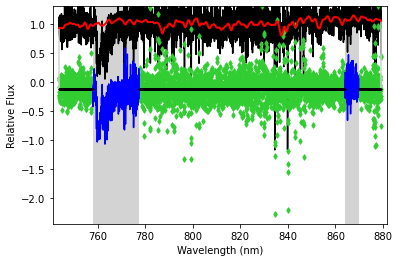

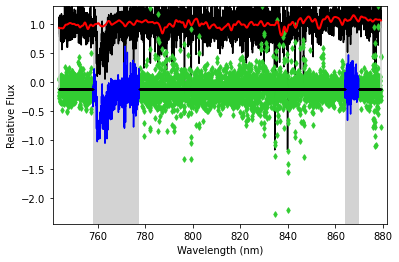

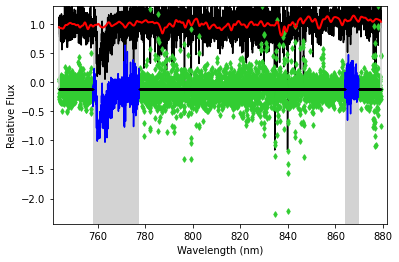

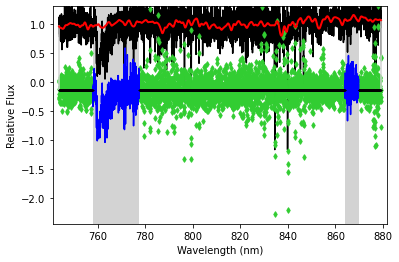

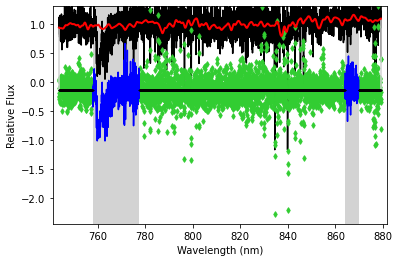

<Figure size 432x288 with 0 Axes>

In [41]:
spec_r.cal_veldis(temp_spec=tm_data, degree=[4, 14], mask_reg=mask_reg_r1, show_weight=True, moments=2)

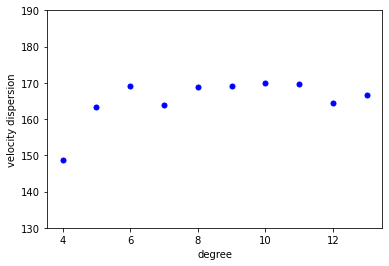

In [43]:
spec_r.plot_veldis(ylim=[130, 190])

order : 8


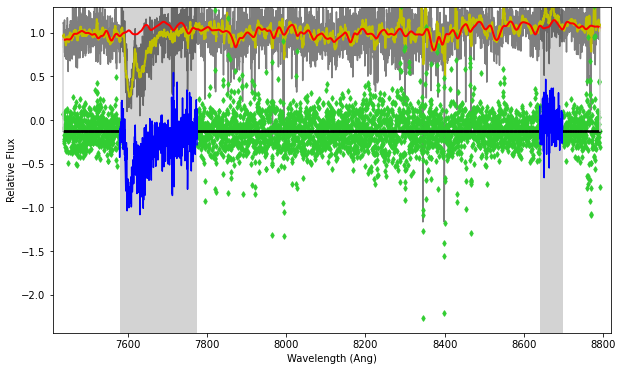

order : 10


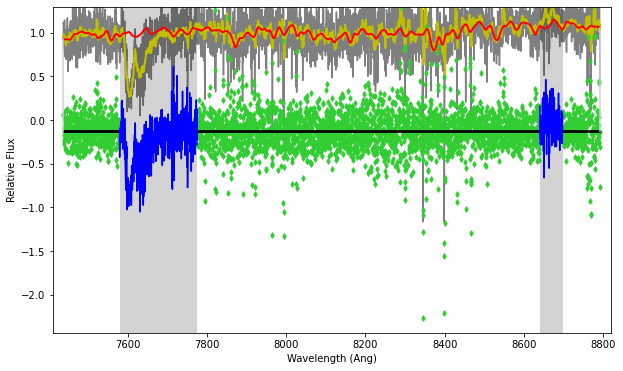

order : 12


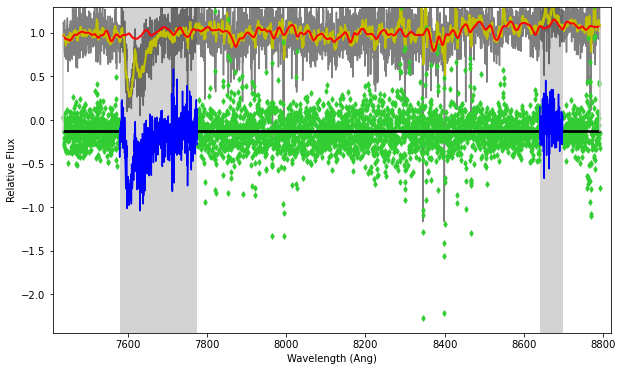

In [44]:
ord_list = np.array([8, 10, 12])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_r.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()

In [55]:
mask_reg_r2 = np.log(np.array([(7580, 7700), (8640, 8697)])) #(8640, 8697)
print(mask_reg_r2)

[[8.93326848 8.94897561]
 [9.06415786 9.07073342]]



degree : 4
 Best Fit:       Vel     sigma
 comp.  0:    144507       163
chi2/DOF: 0.2835; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1272

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:    144499       179
chi2/DOF: 0.2832; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  8 / 1272

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:    144501       182
chi2/DOF: 0.2829; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1272

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:    144503       176
chi2/DOF: 0.2827; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1272

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:    

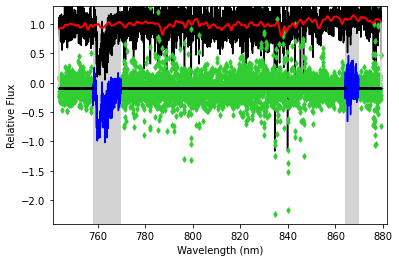

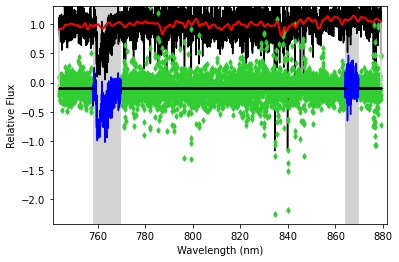

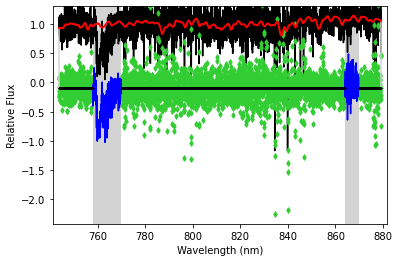

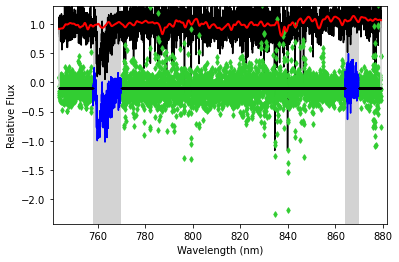

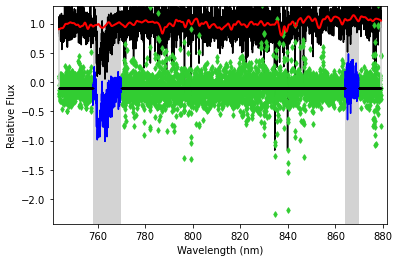

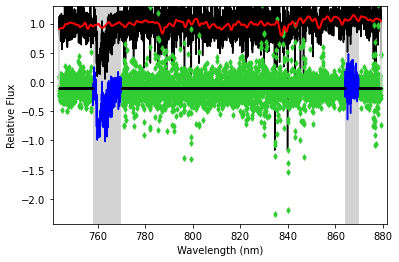

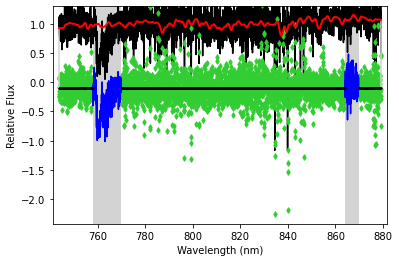

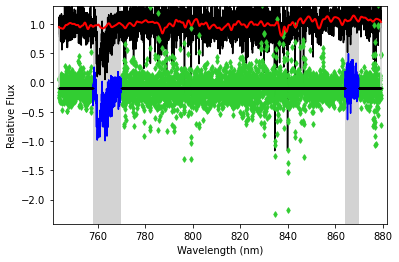

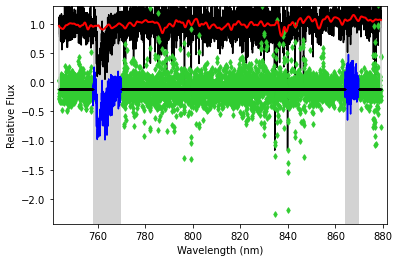

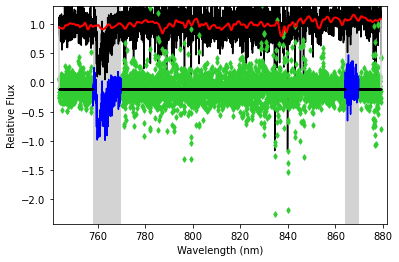

<Figure size 432x288 with 0 Axes>

In [56]:
spec_r.cal_veldis(temp_spec=tm_data, degree=[4, 14], mask_reg=mask_reg_r2, show_weight=True, moments=2)

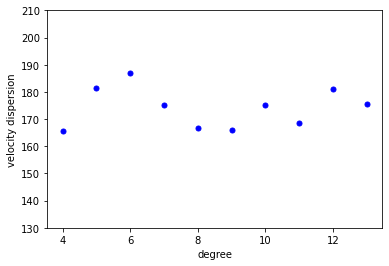

In [54]:
spec_r.plot_veldis(ylim=[130, 210])

order : 8


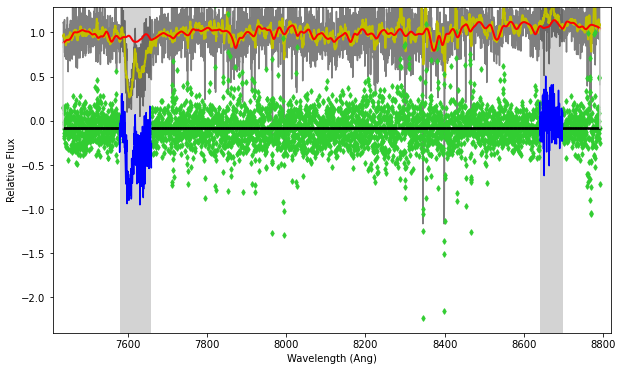

order : 10


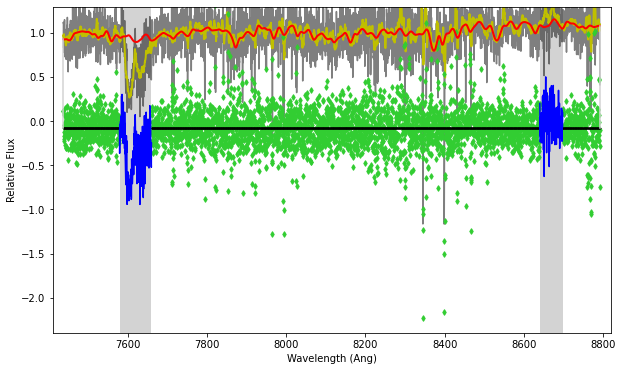

order : 12


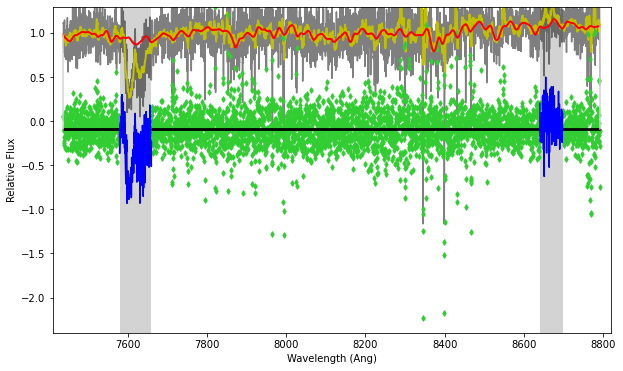

In [52]:
ord_list = np.array([8, 10, 12])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_r.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()

## more test

In [57]:
spec2 = Veldis('../spectra_extraction/B0631_ESI_spectra/spec1d_B0631_esi_coadd2d_deflector.fits', 
              informat='fits', logwav=True, trimsec=[955, 10900])


Reading spectrum from ../spectra_extraction/B0631_ESI_spectra/spec1d_B0631_esi_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  6025.10
 Spectrum End:     8791.03
 Dispersion (1st pixel):   0.23
 Dispersion (average):      0.28



Velocity scale = 11.389911 km/s


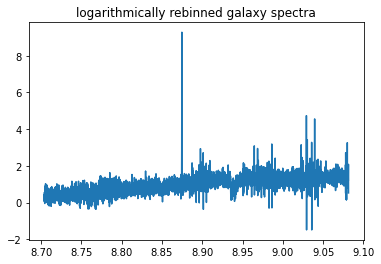

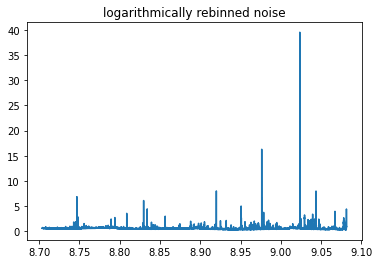

In [58]:
spec2.cal_parm(z=0.620, high_z=False, logscale=True, veldis_start=350, noise_scale=0.5)

In [59]:
temp_spec2 = spec2.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=0.85)


As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -165851.437489 

sigma_diff : 1.569009


In [60]:
mask_reg1 = np.log(np.array([(7137, 7157), (7280, 7347), (7312, 7319), (7338, 7342), (7580, 7775),
                            (8640, 8697)]))
print(mask_reg1)

[[8.8730478  8.87584618]
 [8.89288614 8.90204735]
 [8.89727211 8.89822899]
 [8.9008216  8.90136656]
 [8.93326848 8.95866874]
 [9.06415786 9.07073342]]



degree : 6
 Best Fit:       Vel     sigma
 comp.  0:    144512       149
chi2/DOF: 0.1895; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1272

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:    144517       143
chi2/DOF: 0.1893; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1272

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:    144516       144
chi2/DOF: 0.1893; degree = 8; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  22 / 1272

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:    144515       145
chi2/DOF: 0.1892; degree = 9; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1272

degree : 10
 Best Fit:       Vel     sigma
 comp.  0:  

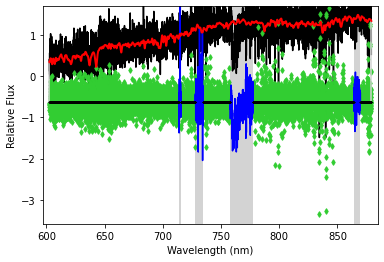

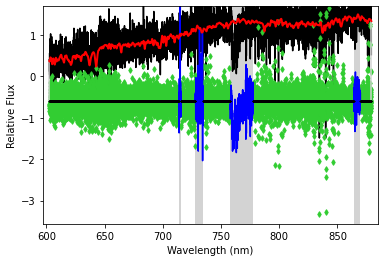

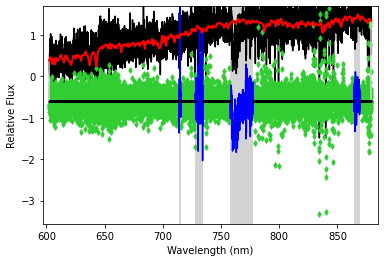

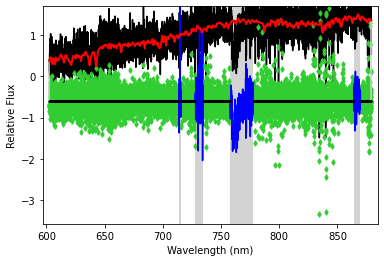

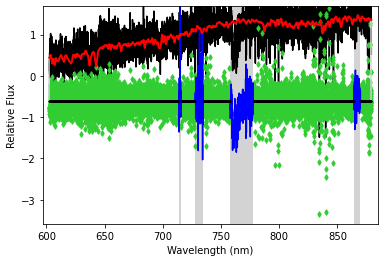

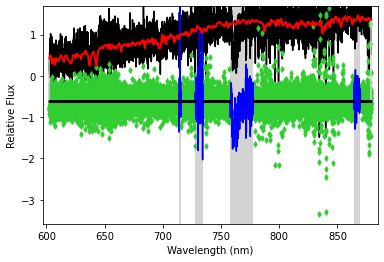

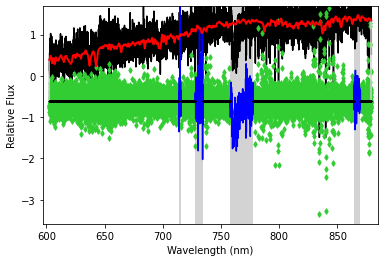

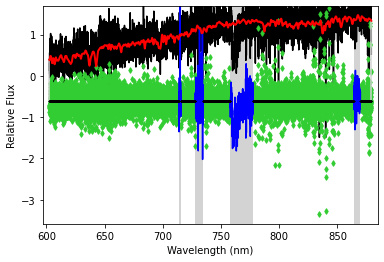

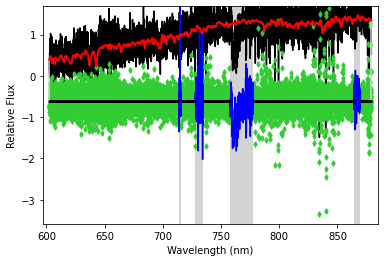

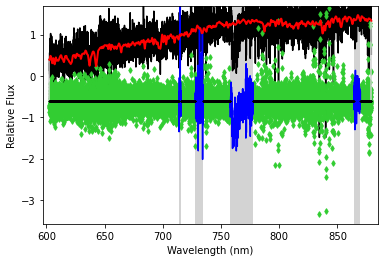

<Figure size 432x288 with 0 Axes>

In [61]:
spec2.cal_veldis(temp_spec=temp_spec2, degree=[6, 16], mask_reg=mask_reg1, show_weight=True, moments=2)

## Lris spectra

In [87]:
spec3 = Veldis('../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector.fits', 
              informat='fits', trimsec=[470, 3930])


Reading spectrum from ../spectra_extraction/B0631_LRIS_spectra/spec1d_B0631_lris_coadd1d_deflector.fits
Expected file format: fits
 Spectrum Start:  6025.37
 Spectrum End:     8792.77
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       6075.00
[Fe VII]      3761.40       6093.47
H-iota        3770.00       6107.40
H-theta       3797.00       6151.14
H-eta         3835.00       6212.70
CN bandhd     3883.00       6290.46
CaII K        3933.67       6372.55
CaII H        3968.47       6428.92
H-delta       4101.00       6643.62
G-band        4305.00       6974.10
H-gamma       4340.00       7030.80
Fe4383        4383.00       7100.46
Ca4455        4455.00       7217.10
Fe4531        4531.00       7340.22
H-beta        4861.00       7874.82
Mg I (b)      5176.00       8385.12



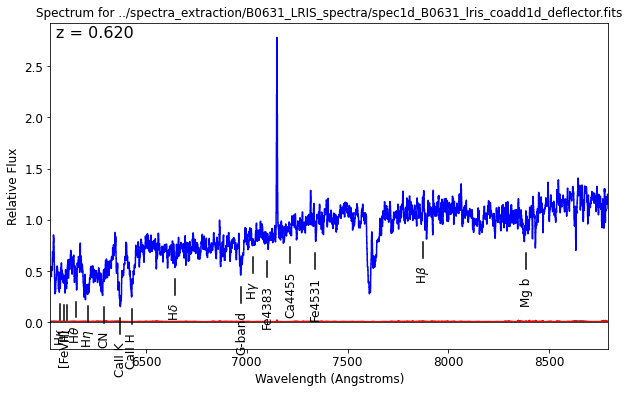

In [88]:
fg = plt.figure(figsize=(10,6))
spec3.smooth(3, fig=fg)
spec3.mark_lines('abs', z=0.620, usesmooth=True)

In [84]:
spec3.closest_wavelength(wavrange=[[6025, 8791]])


Given waverange(assumed) : 

6025 8791

Closest waverange to the given ones : 

6037.368887177659 8791.16814813247


([(6037.368887177659, 8791.16814813247)], [(0, 3442)])

Velocity scale = 32.757335 km/s


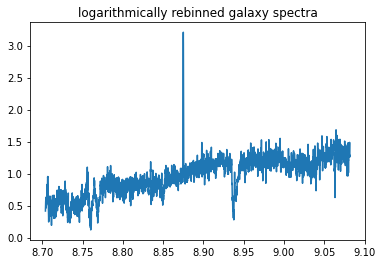

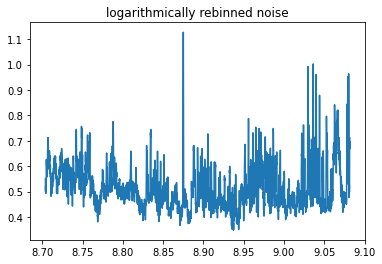

In [89]:
spec3.cal_parm(z=0.620, high_z=False, logscale=False, veldis_start=350, noise_scale=0.5)

In [93]:
temp_spec3 = spec3.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)


As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -165864.984265 

sigma_diff : 2.916961


In [91]:
mask_reg31 = np.log(np.array([(7137, 7157), (7580, 7775)]))
# (7280, 7347), (7312, 7319), (7338, 7342),  (8640, 8697)
print(mask_reg31)

[[8.8730478  8.87584618]
 [8.93326848 8.95866874]]



degree : 6
 Best Fit:       Vel     sigma
 comp.  0:    144648       167
chi2/DOF: 0.03210; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 600

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:    144646       152
chi2/DOF: 0.03141; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 600

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:    144646       153
chi2/DOF: 0.03140; degree = 8; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 600

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:    144646       151
chi2/DOF: 0.03131; degree = 9; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 600

degree : 10
 Best Fit:       Vel     sigma
 comp.  0:  

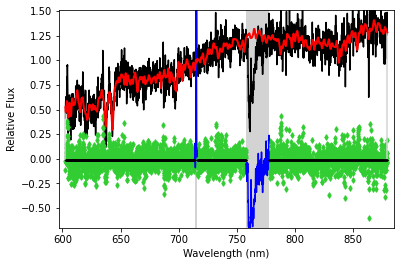

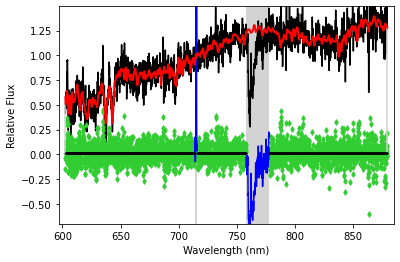

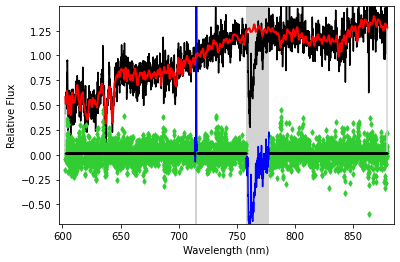

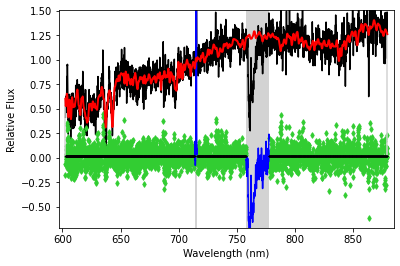

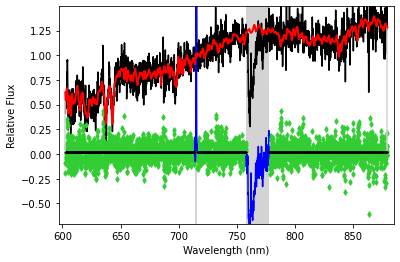

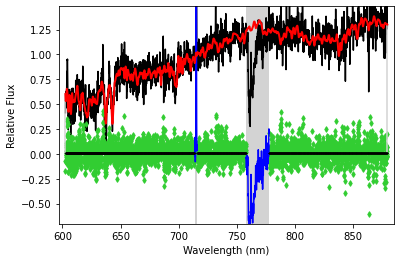

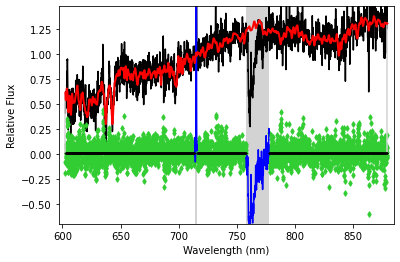

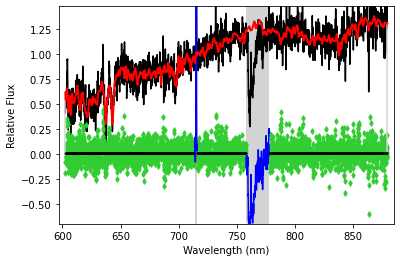

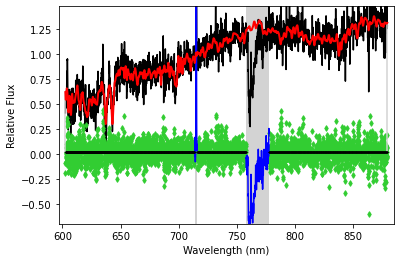

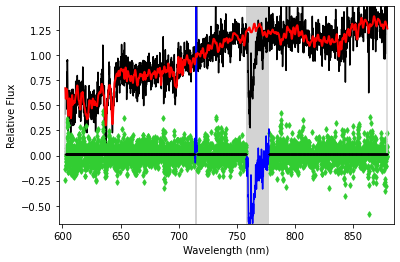

<Figure size 432x288 with 0 Axes>

In [92]:
spec3.cal_veldis(temp_spec=temp_spec3, degree=[6, 16], mask_reg=mask_reg31, show_weight=True, moments=2)

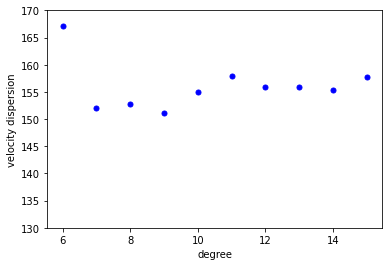

In [94]:
spec3.plot_veldis(ylim=[130, 170])

order : 8


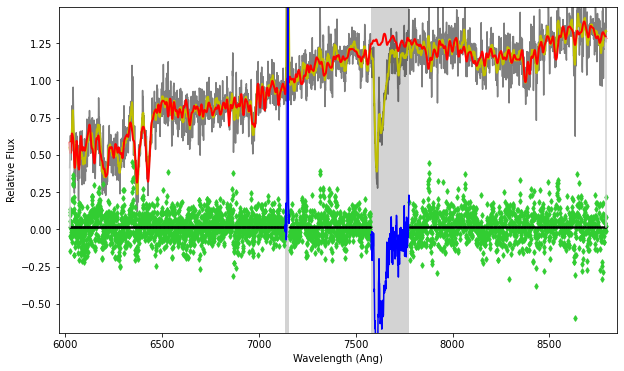

order : 10


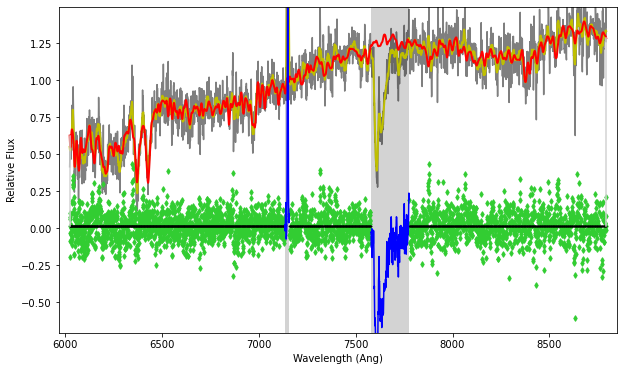

order : 12


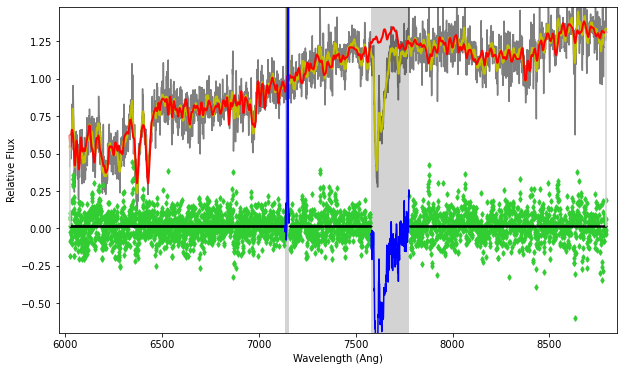

order : 14


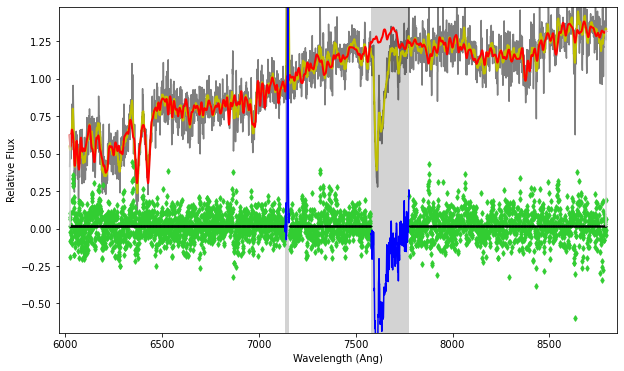

In [95]:
ord_list = np.array([8, 10, 12, 14])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec3.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()